### Week 7 - Feature Selection and Regularization in Regression

Welcome to Week 7 lab. This week we focus our attention on Feature Selection techniques and Regularized Regression methods. Feature selection and regularization are two essential strategies for refining regression models, ensuring they accurately capture the relationships between variables while minimizing overfitting. In this lab, we will provide you with the tools to be able to run Feature Selection techniques and Implement Regularized Linear regression methods. Specifically, we will focus on 2 key areas:

1. Feature Selection
    - Best Subset
    - Forward Selection
    - Backward Selection

2. Regularization in Regression
    - Ridge Regression
    - Lasso Regression



### Feature Selection

Feature selection is a crucial step in the machine learning pipeline that involves identifying and selecting the most relevant variables or features from a dataset to build effective predictive models. You have infact already be performing feature selection through techniques such as looking at the correlation matrix. In this section, we look at some of the more common feature selection in techniques and primarily focus on how to implement them using the R language.

The material on this lab will closely follow the book `ISLR`. As a result, we will use the dataset `Hitters`. Below, we initialize the libraries and the dataset. The goal with the `Hitters` dataset is to predict the salary of a baseball player based on their associated Metrics.

In [2]:
library(ISLR)
library(tidyverse, quietly = TRUE)

data(Hitters)
slice_head(Hitters, n = 10)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<fct>
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N


In [3]:
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

We will first need to check for any missing values, particularly on the dependent variable and omit those.

In [4]:
hitters <- as_tibble(Hitters) %>% 
            filter( !is.na(Salary) )
dim(hitters)

[1] 263  20

### Best Subsets

The Best Subset method involves searching through all possible combinations of features (or variables) to find the single combination that results in the best model performance. This is done by evaluating each subset of features using a chosen metric, such as mean squared error (MSE), and selecting the one with the lowest value.

The package `leaps` offers the function `regsubsets()` which allows us to implement best subsets on the data and returns the best model based on the combination of predictions.  The code below demonstrates how to implement this.

In [5]:
library(leaps)

full_regression_model = regsubsets(Salary ~ . , data = hitters)
summary(full_regression_model)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " "

In reading the output, we should not that the '*' means that the variable is included in the model. We should also notice that by default, the `regsubsets()` function only returns the best performing model with 8 variables. We can of course increase and/or decrease this number.

In [6]:
reg_model_full = regsubsets(Salary ~ . , 
                            data = hitters, 
                            nvmax = 19) # return as many as 19 variables

summary(reg_model_full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"

It should be noted that the summary function also returns the metrics asssociated with the best subset feature selection. We can get the names of the associated metrics by checking the summary object names.

In [7]:
names(summary(reg_model_full))

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

### Evaluating Best Subset Metrics Visually

In the lecture discussions, we discussed comparison metrics including $R^2$, $R^2_{adjusted}$, mallow's $CP$, $AIC$ and $BIC$. All of these metrics provide useful benchmarks for determining the variables that offer the best predictive power. These values can all be retrieved from the subsets output object.

We can inspect these visually using the `plot()` as demonstrated below. Note that the top model refers to the optimal/best subset.

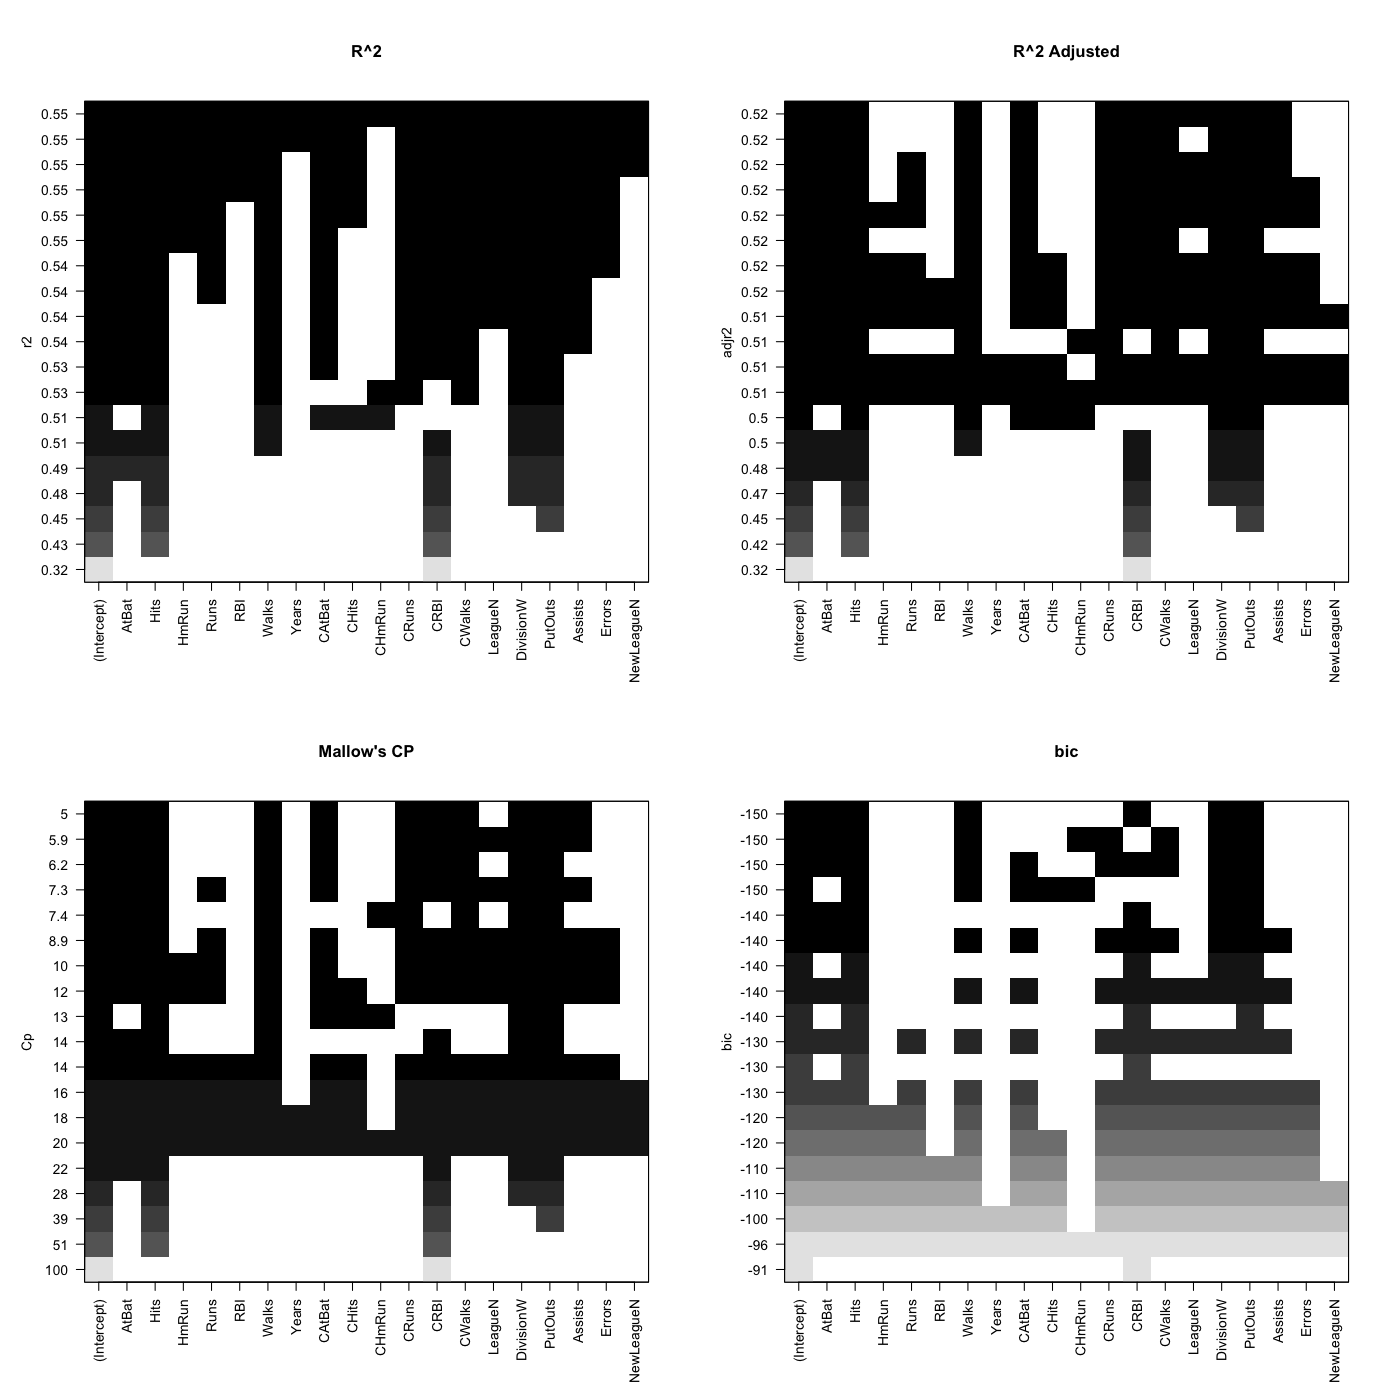

In [8]:
# using ggthemr
library(ggthemr)
ggthemr('fresh')

options(repr.plot.width = 14, repr.plot.height = 14, repr.plot.res = 100)

par(mfrow = c(2, 2))
plot(reg_model_full, scale = "r2"); title("R^2");
plot(reg_model_full, scale = "adjr2"); title("R^2 Adjusted");
plot(reg_model_full, scale = "Cp"); title("Mallow's CP");
plot(reg_model_full, scale = "bic"); title("bic");

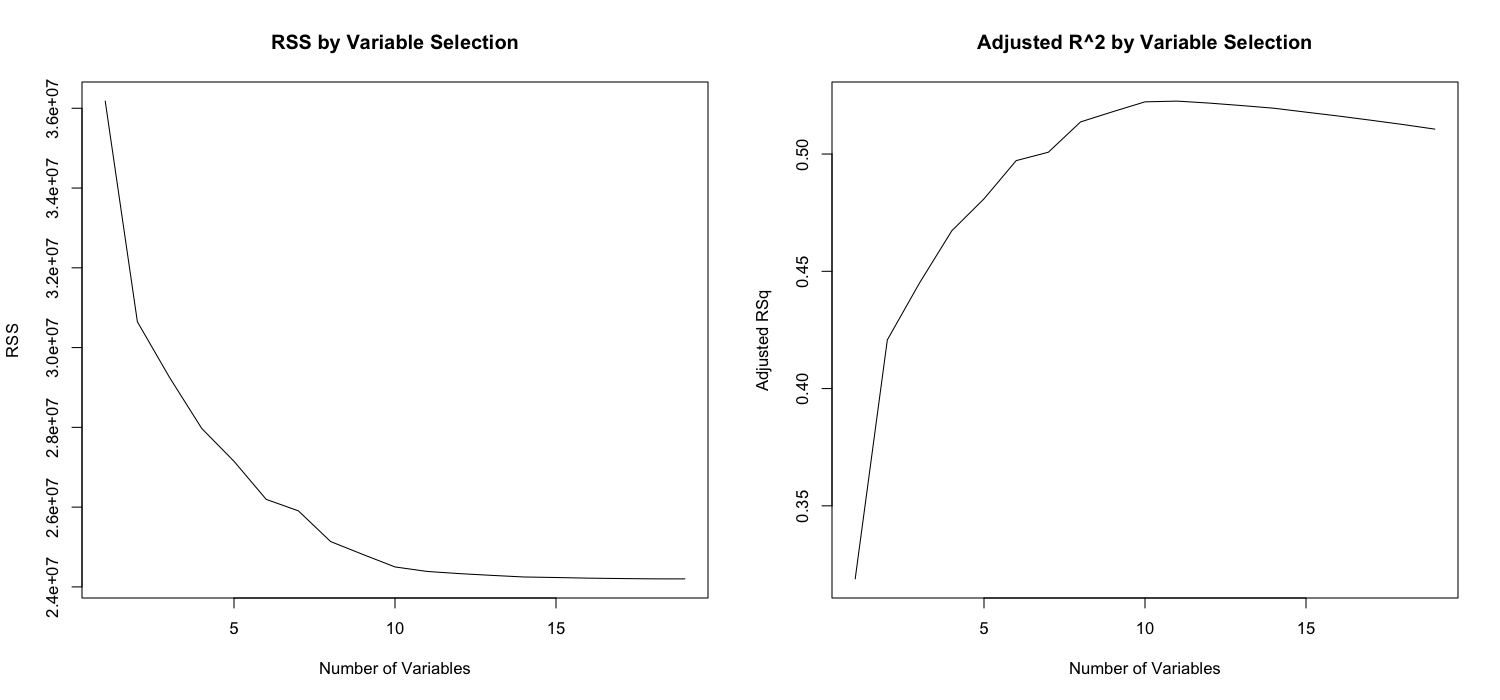

In [9]:
options(repr.plot.width = 15, repr.plot.height = 7, repr.plot.res = 100)

par(mfrow = c(1, 2))
plot(summary(reg_model_full)$rss, xlab = "Number of Variables", ylab = "RSS", type = "l");
title("RSS by Variable Selection")
plot(summary(reg_model_full)$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "l");
title("Adjusted R^2 by Variable Selection")

### Retrieving the Coefficients


We observe that multiple combinations of predictors can yield similar assessment metrics. To extract the selected variables and their coefficients, we can use the `coef()` function, specifying the model and the desired number of predictors. Based on the plot of adjusted $R^2$, it appears that the model with 11 predictors optimally explains the variation in the response variable.

In [10]:
coef(reg_model_full, 11)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 135.7512195   -2.1277482    6.9236994    5.6202755   -0.1389914    1.4553310 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.7852528   -0.8228559   43.1116152 -111.1460252    0.2894087    0.2688277

<br>

### Implementing Forward and Backward Stepwise Selection

We have seen how to implement subsets and to retrive metrics from their summaries. The implementation of Forward and Backward Selection is straight forward. We simply pass the method `forward` and `backward` to the method argument. We can get all the information about the metrics in exactly the same ways we did above.

In [11]:
# forward model variable selection
reg_model_forward <- regsubsets(Salary ~ ., data = hitters, nvmax = 19, method = "forward")

# summary of model forward
summary(reg_model_forward)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [12]:
# backward model variable selection
reg_model_backward <- regsubsets(Salary ~ ., data = hitters, nvmax = 19, method = "backward")

# summary of model forward
summary(reg_model_backward)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


This concludes this part of the lab. We will pick up on the next part of the lab using the RStudio and R Quarto Notebooks.